# 1. Ridge

- L2 norm 적용 linear regression

In [31]:
from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score 
import numpy as np

In [22]:
boston_df = pd.read_csv('../datasets/boston/Boston.csv')

In [23]:
y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

In [6]:
# Ridge 클래스
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(f'5folds의 평균 RMSE : {avg_rmse : .3f}')

5folds의 개별 Negative MSE scores:  [-14.604 -24.249 -28.83  -74.663 -27.7  ]
5folds의 개별 RMSE scores :  [3.821 4.924 5.369 8.641 5.263]
5folds의 평균 RMSE :  5.604


In [9]:
# alpha 변경시 -> RMSE 변화 추이 확인 

# Ridge에 사용될 alpha 리스트
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값 iteration 하며, 각 alpha별 RMSE 
for alpha in alphas :
    ridge = Ridge(alpha=alpha)

    # cross_val_score 이용하여 5 fold의 평균 RMSE
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring= 'neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha = {alpha}일 때, 5 folds의 평균 RMSE : {avg_rmse : .3f}')

alpha = 0일 때, 5 folds의 평균 RMSE :  5.844
alpha = 0.1일 때, 5 folds의 평균 RMSE :  5.807
alpha = 1일 때, 5 folds의 평균 RMSE :  5.693
alpha = 10일 때, 5 folds의 평균 RMSE :  5.604
alpha = 100일 때, 5 folds의 평균 RMSE :  5.500


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

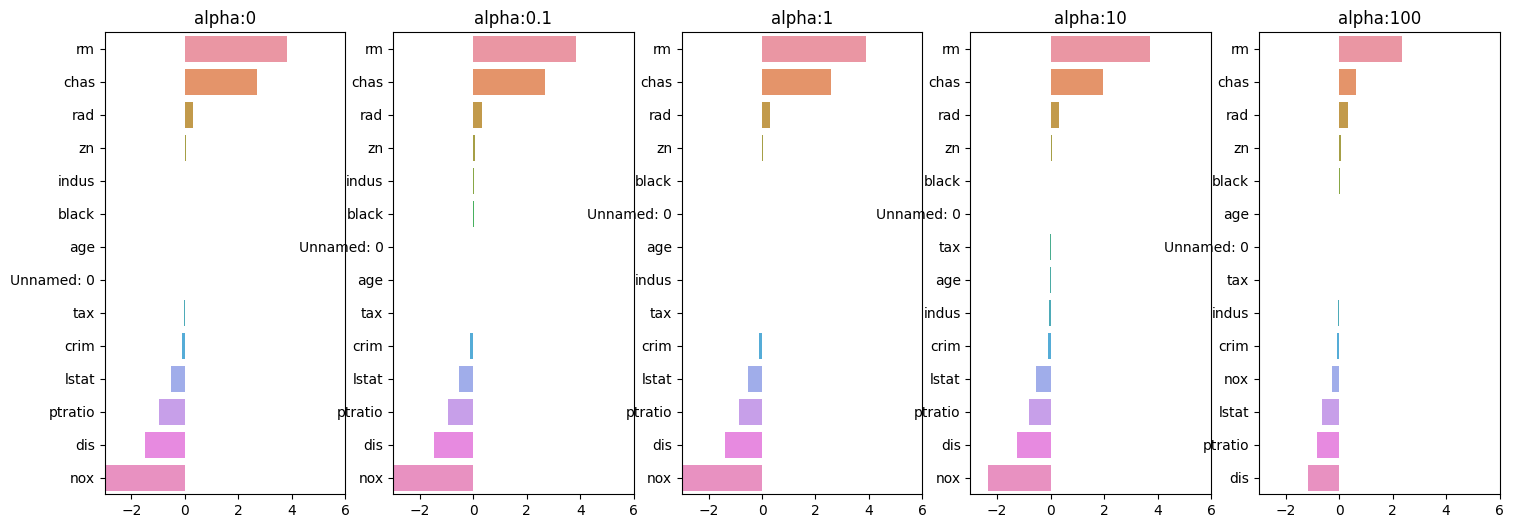

In [12]:
# Let's check whether coefficients is getting smaller when alpha get increased


# 각 alpha에 따른 회귀계수 값을 시각화하기 위해 5개의 열로 된 matplotlib  Axis 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀계수 값을 저장하기 위한 Dataframe
coeff_df = pd.DataFrame()
# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # bar 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 정렬.
    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
# for 문 밖에서 matplotlib show호출 및 alpha에 따른 feature별 회귀 계쑤를 DataFrame으로 표시
plt.show()

C:\Users\zino0\AppData\Local\Temp\ipykernel_26080\4245672789.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ridge.fit(X_data, y_target)
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.523e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

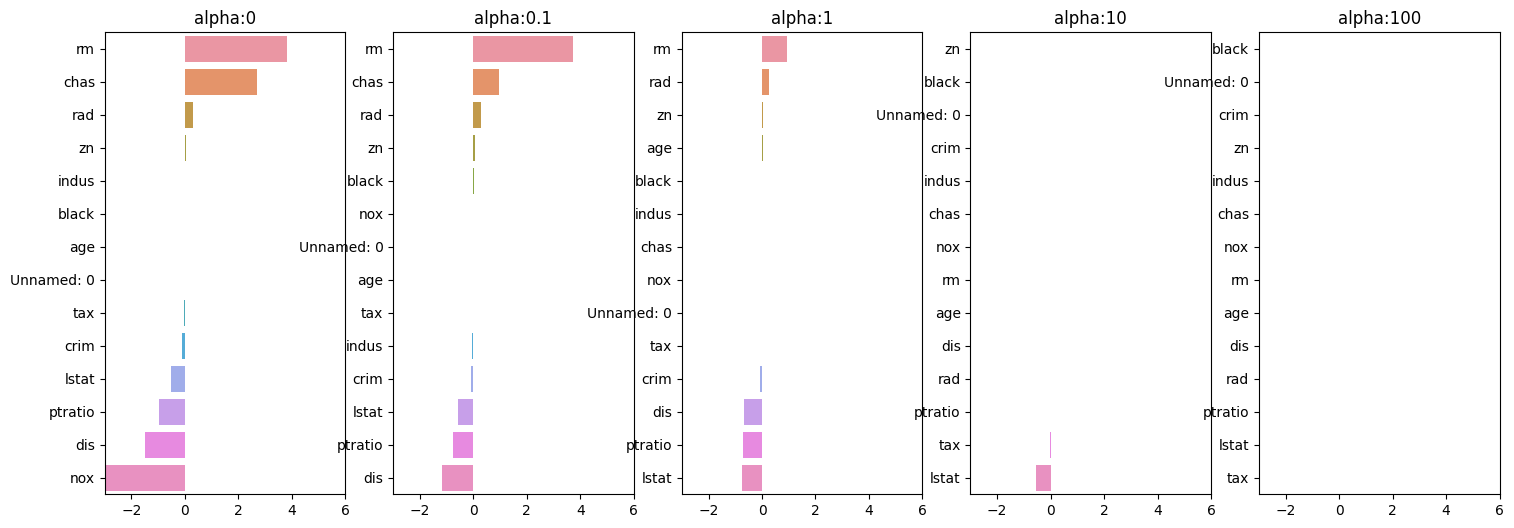

In [32]:
# Lasso
# 각 alpha에 따른 회귀계수 값을 시각화하기 위해 5개의 열로 된 matplotlib  Axis 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀계수 값을 저장하기 위한 Dataframe
coeff_df = pd.DataFrame()
# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Lasso(alpha= alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # bar 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 정렬.
    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
# for 문 밖에서 matplotlib show호출 및 alpha에 따른 feature별 회귀 계쑤를 DataFrame으로 표시
plt.show()

C:\Users\zino0\AppData\Local\Temp\ipykernel_26080\1469404140.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ridge.fit(X_data, y_target)
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.523e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

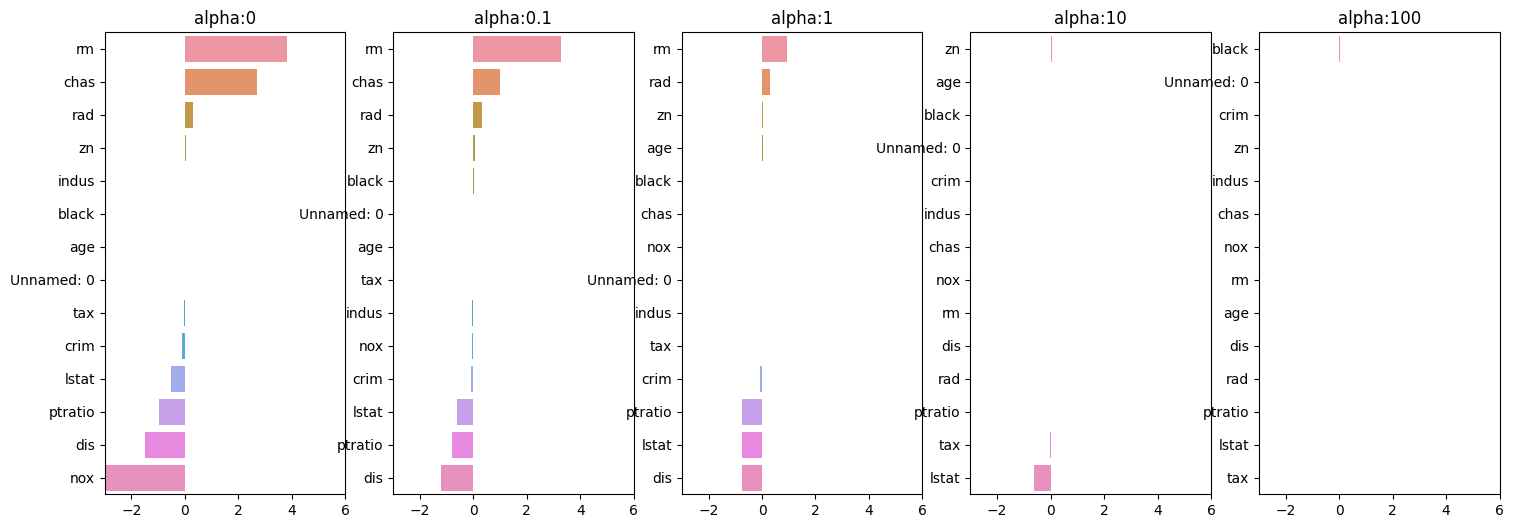

In [33]:
# ElasticNet
# 각 alpha에 따른 회귀계수 값을 시각화하기 위해 5개의 열로 된 matplotlib  Axis 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀계수 값을 저장하기 위한 Dataframe
coeff_df = pd.DataFrame()
# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = ElasticNet(alpha= alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # bar 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 정렬.
    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
# for 문 밖에서 matplotlib show호출 및 alpha에 따른 feature별 회귀 계쑤를 DataFrame으로 표시
plt.show()

In [13]:
# alpha 에 따른 회귀계수 
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending=False)


# Ridge regression 에서 alpha 증가할수록 Nox값 감소하여, 다른 회귀계수값들과 스케일 비슷해짐. 
    # 이로 인해 기존 회귀모델 성능이 개선 

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.839225,3.847742,3.884133,3.730589,2.348374
chas,2.705245,2.688771,2.572215,1.968828,0.642700
rad,0.324925,0.322626,0.310511,0.301086,0.332157
zn,0.048031,0.048197,0.049148,0.051333,0.055823
indus,0.019932,0.015425,-0.009068,-0.042707,-0.052455
black,0.009357,0.009413,0.009716,0.010075,0.009416
age,-0.001938,-0.002915,-0.008131,-0.013394,-0.000734
Unnamed: 0,-0.002526,-0.002553,-0.002694,-0.002796,-0.002172
tax,-0.011598,-0.011675,-0.012119,-0.013164,-0.015208
crim,-0.108762,-0.108240,-0.105445,-0.102379,-0.102900


In [19]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀모델의 폴드 평균RMSE 출력하고, 회귀계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params :
        if model_name =='Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때, 5 fold 세트의 평균 RMSE: {avg_rmse : .3f}')

        # cross_val_score는 evaluation metirc만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀계수를 Series로 변환하고, 이를 DF의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [20]:
# Lasso에 사용될 alpha 파라미터 값들 List -> get_linear_reg_eval() 호출
lasso_alphas = [.07, .1, .5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때, 5 fold 세트의 평균 RMSE:  5.714
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.731
alpha 0.5일 때, 5 fold 세트의 평균 RMSE:  5.868
alpha 1일 때, 5 fold 세트의 평균 RMSE:  6.082
alpha 3일 때, 5 fold 세트의 평균 RMSE:  6.783


In [27]:
# 반환되 coeff_lasso_df를 첫번째 컬럼순으로 내림차순으로 정렬후 회귀계수 DF 출력
sort_column = 'alpha' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
rm,3.818942,3.731253,2.514752,0.951835,0.000000
chas,1.456124,0.976090,0.000000,0.000000,0.000000
rad,0.292072,0.295033,0.289568,0.266066,0.043498
zn,0.050777,0.050862,0.050519,0.049306,0.036391
black,0.010285,0.010284,0.009491,0.008250,0.006497
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
Unnamed: 0,-0.002738,-0.002631,-0.001545,-0.000216,0.002388
tax,-0.013477,-0.013789,-0.014993,-0.015155,-0.009370
age,-0.014332,-0.012560,0.002135,0.020707,0.043925
indus,-0.041745,-0.036255,-0.004927,-0.000000,-0.000000


In [28]:
# elasticnet에 사용될 alpha 파라미터 List
# l1_ratio = 0.7 로 고정

elastic_alphas = [.07, .1, .5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때, 5 fold 세트의 평균 RMSE:  5.647
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.645
alpha 0.5일 때, 5 fold 세트의 평균 RMSE:  5.682
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.902
alpha 3일 때, 5 fold 세트의 평균 RMSE:  6.607


In [30]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬 후 회귀계수 DF 출력
sort_column = 'alpha' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
rm,3.601129,3.438970,1.928772,0.941199,0.000000
chas,1.346550,0.993541,0.000000,0.000000,0.000000
rad,0.299580,0.303398,0.312441,0.293131,0.133409
zn,0.051794,0.052230,0.053800,0.052423,0.037272
black,0.010158,0.010100,0.009132,0.008325,0.007012
Unnamed: 0,-0.002684,-0.002573,-0.001486,-0.000479,0.001819
age,-0.012691,-0.010708,0.006419,0.019934,0.044864
tax,-0.013729,-0.014053,-0.015613,-0.016078,-0.012004
indus,-0.044587,-0.042322,-0.022934,-0.000000,-0.000000
crim,-0.100386,-0.100111,-0.089590,-0.073759,-0.018629


(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

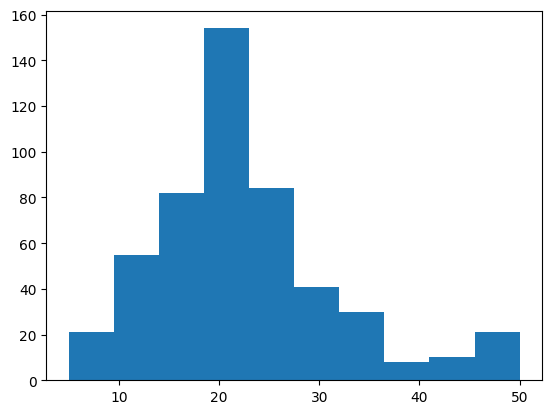

In [40]:
# Boston Data, EDA 해보니 label 값들은 정규화 비교적 Good
    # Feature값들만 정규화 해보자 !

print(y_target.shape)
plt.hist(y_target, bins=10)

In [43]:
# Preprocessing(정규화, 로그변환) 함수 정의

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준정규분포변환(Standard), 최대&최소값 정규화(MinMaz), 로그변환(Log) 결정
# p_degree, 다항식 특성 추가할때 적용. 2 이상은 부여하지 않음
def get_scaled_data(method='None', p_degree = None, input_data = None):
    if method == 'Standard' :
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax' :
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else : 
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [46]:
# Ride의 alphar값 List, 다양한 데이터 변환방법에 따른 RMSE
alphas = [.1, 1, 10, 100]

# 변환방법은 모두 6개 원본 그대로, 표준정규분포, 표준정규분포+다항식, 최대/최소 정규화, 최대/최소 정규화+다항식, 로그벼노한
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print(f'\n## 변환유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}')

    # alpha 값에 따른 회귀모델의 폴드평균 RMSE 출력, 회귀계수 값들을 DF로 반환해주는 함수 
    get_linear_reg_eval('Ridge', params = alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환유형:None, Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.807
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.693
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.604
alpha 100일 때, 5 fold 세트의 평균 RMSE:  5.500

## 변환유형:Standard, Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.841
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.821
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.681
alpha 100일 때, 5 fold 세트의 평균 RMSE:  5.538

## 변환유형:Standard, Polynomial Degree:2
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  9.700
alpha 1일 때, 5 fold 세트의 평균 RMSE:  7.583
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.991
alpha 100일 때, 5 fold 세트의 평균 RMSE:  4.817

## 변환유형:MinMax, Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.787
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.547
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.933
alpha 100일 때, 5 fold 세트의 평균 RMSE:  7.720

## 변환유형:MinMax, Polynomial Degree:2
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  6.187
alpha 1일 때, 5 fold 세트의 평균 RMSE:  4.567
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.306
alpha 100일 때, 5 fold 세트의 평균 RMSE:  6.625